In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
import testing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ip = "147.32.83.171"

In [2]:
ssh_tunnel = SSHTunnelForwarder(
    ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))
result_engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='betexplorer'
    ))



In [17]:
testing_probs = [0.5,0.6,0.7,0.8,0.9,0.95,1]
profits = {}
betting_vectors = {}
for p in testing_probs:
   profits[p],betting_vectors[p]=testing.test(p=p,matchids=[0], timestamp='2022-09-27 21:00:00',engine=engine,res_engine=result_engine)

0.0
0.08940545373267769
0.17881090746535538
0.2682163611980331
0.35762181493071077
0.4470272686633885
0.5364327223960662
0.6258381761287438
0.7152436298614215
0.8046490835940993
0.894054537326777
0.9834599910594546
0.6300402324541797
0.0
0.08940545373267769
0.17881090746535538
0.2682163611980331
0.35762181493071077
0.4470272686633885
0.5364327223960662
0.6258381761287438
0.7152436298614215
0.8046490835940993
0.894054537326777
0.9834599910594546
0.5724631202503353
0.0
0.08940545373267769
0.17881090746535538
0.2682163611980331
0.35762181493071077
0.4470272686633885
0.5364327223960662
0.6258381761287438
0.7152436298614215
0.8046490835940993
0.894054537326777
0.9834599910594546
0.5032632990612428
0.0
0.08940545373267769
0.17881090746535538
0.2682163611980331
0.35762181493071077
0.4470272686633885
0.5364327223960662
0.6258381761287438
0.7152436298614215
0.8046490835940993
0.894054537326777
0.9834599910594546
0.4708091193562807
0.0
0.08940545373267769
0.17881090746535538
0.2682163611980331
0

In [40]:
cumulative_sums = {}
lengths = {}
for p in testing_probs:
    #cumulative_sums[p]=np.cumsum(results[p])
    #lengths[p] = len(results[p])
    print(sum(profits[p])/len(profits[p]))

3229.4987398768517
3531.7666675350297
4124.97821093792
4184.116941795369
3955.385189536003
3944.0626316001612
3933.1526799015946


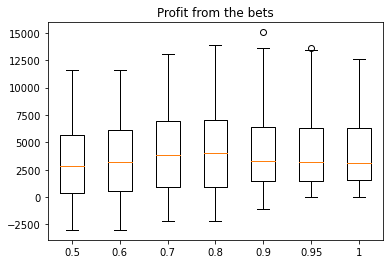

In [31]:
plt.boxplot(profits.values(),labels=profits.keys())
plt.title("Profit from the bets")
plt.show()




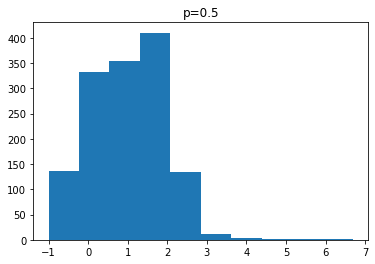

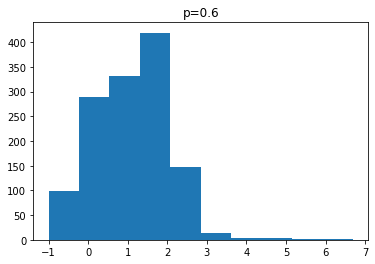

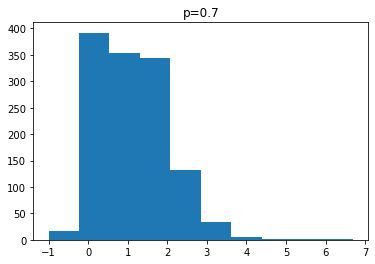

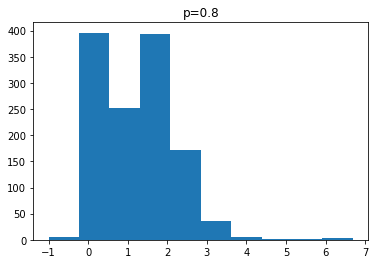

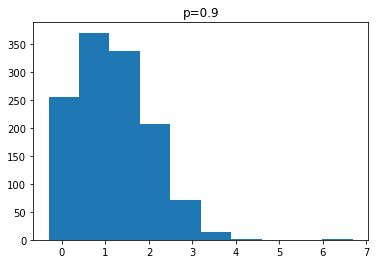

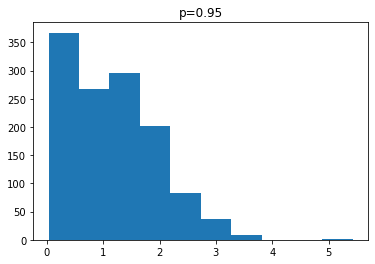

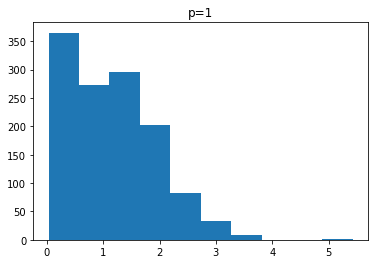

In [69]:
partial_sums = {}
for p in testing_probs:
    partial_sums[p] = []
    for n in betting_vectors[p]:
        #print(n)
        partial_sums[p].append(sum(n[:-1]))
    hlp =np.array(profits[p])/np.array(partial_sums[p])
    plt.hist(hlp)
    plt.title('p={p}'.format(p=p))
    plt.show()

#shows ratio between invested amount and profited amount

In [71]:
for p in testing_probs:
    print(len(profits[p]))

1387
1305
1282
1266
1261
1261
1260
